### Read data from simulation

In [6]:
# Library for reading simulation data
import numpy as np

# Parameters
b = 3.0         # bond length
N = 2           # number of bonds
T = 1000        # Number of conformations

# Coordinates arrays
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

# Read simulation data
filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
with open(filename,'r') as f:
    for t in range(T):
        # First 2 lines unnecessary
        lines = f.readline()
        lines = f.readline()
        # Save coordinates and separate in x, y, z
        for i in range(N+1):
            lines = f.readline()
            coord = lines.split()
            x[t,i]=float(coord[1])
            y[t,i]=float(coord[2])
            z[t,i]=float(coord[3])

### Compute and plot time series of metrics $Q$ & $R_g$

Compute and plot end-to-end distance, $Q$, and radius of gyration, $R_g$,

In [7]:
# Initialize variables
Q=np.zeros((T,3))
R=np.zeros((T,3))

# Compute them according its definition
for t in range(T):
    Q[t,0]=x[t,N]-x[t,0]
    Q[t,1]=y[t,N]-y[t,0]
    Q[t,2]=z[t,N]-z[t,0]
    R[t,0]=np.sum((x[t,:]-np.mean(x[t,:]))**2)
    R[t,1]=np.sum((y[t,:]-np.mean(y[t,:]))**2)
    R[t,2]=np.sum((z[t,:]-np.mean(z[t,:]))**2)
Q=np.sqrt(np.sum(Q**2,axis=1))
R=np.sqrt(np.sum(R,axis=1)/N)

#### Plot it

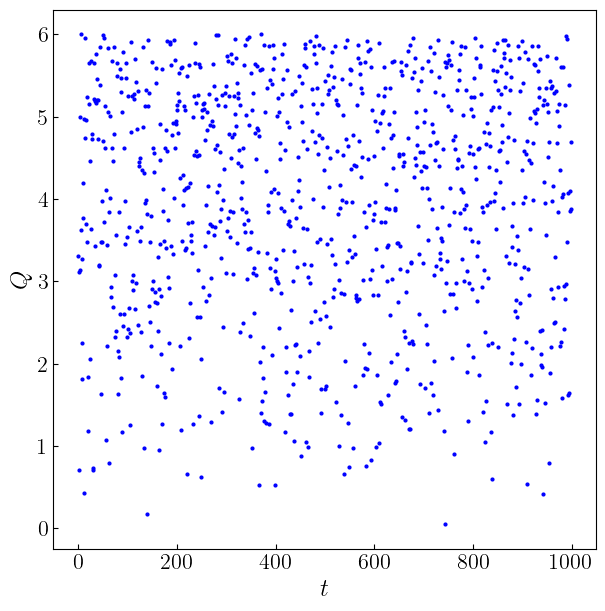

In [8]:
# Plot it using points
import matplotlib.pyplot as plt

# LaTeX compiler
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.plot(Q, 'bo', markersize=2)
plt.xlabel(r'$t$', fontsize=18)
plt.ylabel(r'$Q$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')


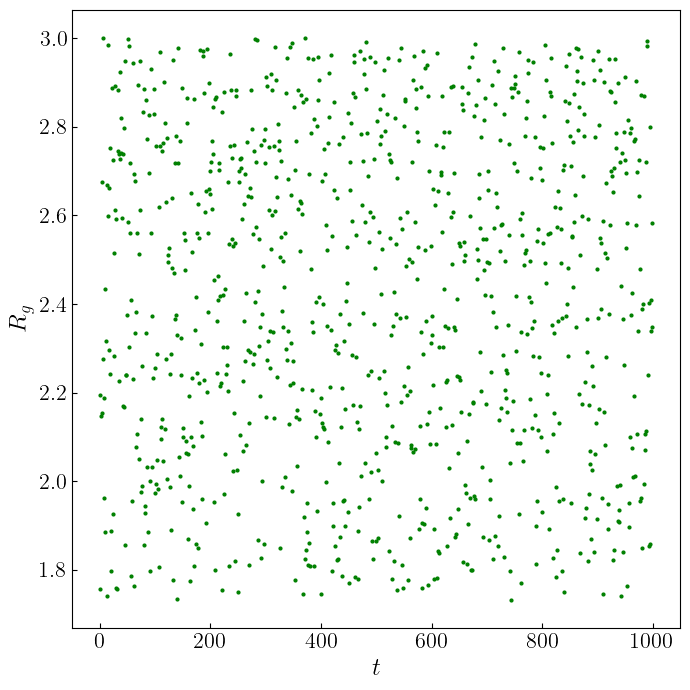

In [9]:
plt.figure(figsize=(7,7))
plt.plot(R, 'go', markersize=2)
plt.xlabel(r'$t$', fontsize=18)
plt.ylabel(r'$R_g$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.tight_layout()
plt.show()

Compute the mean squared value of the end-to-end distance, $\langle Q^2 \rangle$, and radius of gyration, $\langle R_g^2 \rangle$,

In [10]:
# Compute values
Q2=np.mean(Q**2)
R2=np.mean(R**2)

# Theoretical values
Q2_theory=b**2 * N
R2_theory=b**2 * N/6

# Print them
print('Q^2 = %.2f, Q^2_theory = %.2f'%(Q2,Q2_theory))
print('R^2 = %.2f, R^2_theory = %.2f'%(R2,R2_theory))

Q^2 = 17.64, Q^2_theory = 18.00
R^2 = 5.94, R^2_theory = 3.00
